# Demonstration of Basic Synapse Models

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import sys

from neural.model.synapse import *
from neural.plot import plot_multiple
from neural.utils import compute_psth, generate_spike_from_psth, generate_stimulus

%load_ext autoreload
%autoreload 2

Define input stimulus.

In [2]:
dt  = 1e-4
dur = 3.
num = 50

waveform = generate_stimulus('step', dt, dur-dt/2, (0.5, 2.5), 100.)
spikes = generate_spike_from_psth(dt, waveform, num=num)
t = np.arange(0, len(waveform)*dt-dt/2, dt)

Simulate synapse models.

In [3]:
model_list = [AMPA, NMDA, GABAB, Alpha, Exponential]
record = {key:np.zeros((num, len(waveform))) for key in model_list}


for i, spike in enumerate(spikes):
    models = [model() for model in model_list]              
    for j, (spk, wav) in enumerate(zip(spike, waveform)):
        for m, M in zip(models, model_list):
            m.update(dt, stimulus=spk)
            record[M][i][j] = m.s * m.gmax

Plot the simulation result. Note that the parameters of every models are tuned accordingly so that each models has similar response.

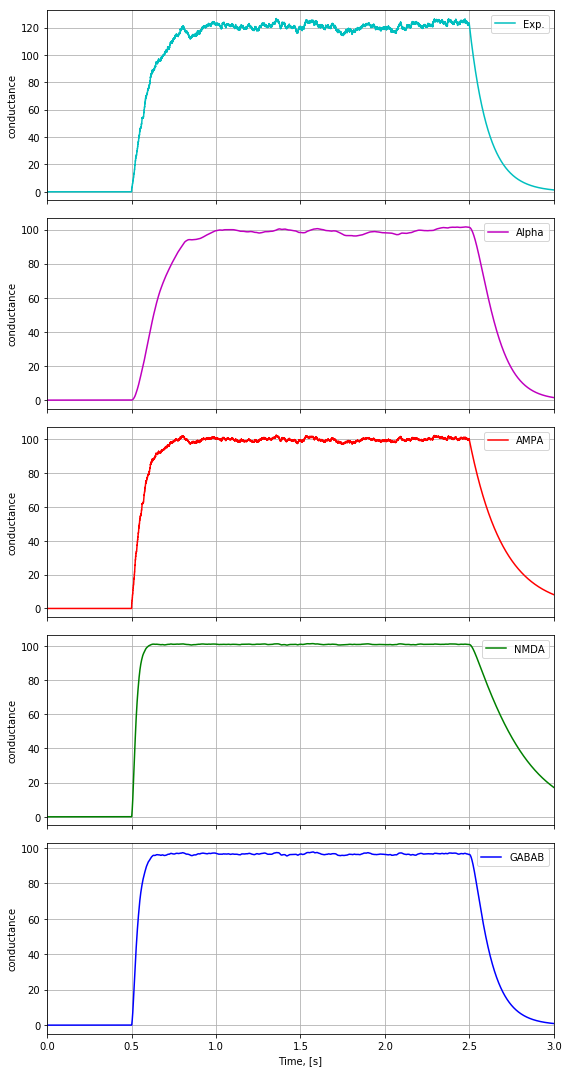

In [4]:
fig, axes = plot_multiple(
    t,
    (record[Exponential].mean(axis=0), {'color':'c', 'label':'Exp.'}),
    (record[Alpha].mean(axis=0), {'color':'m', 'label':'Alpha'}),
    (record[AMPA].mean(axis=0), {'color':'r', 'label':'AMPA'}),
    (record[NMDA].mean(axis=0), {'color':'g', 'label':'NMDA'}),
    (record[GABAB].mean(axis=0), {'color':'b', 'label':'GABAB'}),
    xlim=(0,3), figw=8, figh=3, ylabel='conductance')